# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Creating a Subset
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. Importing Visualization Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = r'/Users/maitran/Documents/Grad Rate NY 2022'

In [6]:
# Import clean data
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'grad_rate_22_wrangled.csv'), index_col = 0)

/var/folders/y2/dchd2q8n46v5x913n10wj3ph0000gn/T/ipykernel_46336/2202279211.py:2: DtypeWarning: Columns (1,3,5,6,8,9,12,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'grad_rate_22_wrangled.csv'), index_col = 0)


In [7]:
# Check the import

df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,needs_to_resource_capacity_description,county_code,county_name,boces_name,membership_code,...,non_diploma_credential_count,non_diploma_credential_percentage,still_enroll_count,still_enroll_percentage,ged_count,ged_percentage,dropout_count,dropout_percentage,Unnamed: 32,Unnamed: 33
142.0,2021-22,1.0,Need/Resource Category,1.0,NRC: NYC,NYC,NaN,NaN,NaN,6.0,...,746,1,2174,3,1042,1,7099,10,NaN,NaN
143.0,2021-22,1.0,Need/Resource Category,1.0,NRC: NYC,NYC,NaN,NaN,NaN,6.0,...,490,1,1450,4,627,2,4631,12,NaN,NaN
144.0,2021-22,1.0,Need/Resource Category,1.0,NRC: NYC,NYC,NaN,NaN,NaN,6.0,...,256,1,724,2,415,1,2468,7,NaN,NaN
145.0,2021-22,1.0,Need/Resource Category,1.0,NRC: NYC,NYC,NaN,NaN,NaN,6.0,...,9,0,806,1,727,1,4918,8,NaN,NaN
146.0,2021-22,1.0,Need/Resource Category,1.0,NRC: NYC,NYC,NaN,NaN,NaN,6.0,...,737,5,1368,10,315,2,2181,16,NaN,NaN


## 2. Creating a Subset

In [8]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_code', 'aggregation_name',
       'needs_to_resource_capacity_description', 'county_code', 'county_name',
       'boces_name', 'membership_code', 'membership_key', 'membership_desc',
       'subgroup_code', 'subgroup_name', 'enroll_count', 'grad_count',
       'grad_percentage', 'local_count', 'local_percentage',
       'regents_diploma_count', 'regents_diploma_percentage',
       'regents_advanced_count', 'regents_advanced_percentage',
       'non_diploma_credential_count', 'non_diploma_credential_percentage',
       'still_enroll_count', 'still_enroll_percentage', 'ged_count',
       'ged_percentage', 'dropout_count', 'dropout_percentage', 'Unnamed: 32',
       'Unnamed: 33'],
      dtype='object')

We are going to do some analysis regarding only numerical values. For this reason I'm going to create a subset 
containing only the variables needed for this purpose. I'm going to discard 'report_school_year', 'aggregation_type', 'aggregation_name','needs_to_resource_capacity_description''aggregation_index','aggregation_code', 'county_code', 'county_name', 'membership_code', 'boces_name', 'membership_key', 'subgroup_code', 'membership_desc' and 'subgroup_name'. 

Questions to explore:
How does the graduation rate relate to the enroll rate?
Are there any significant differences in graduation rates between students who earned a Regents diploma and those who earned a Local diploma?
Are there any patterns or trends in the dropout rates among different demographic subgroups?
Any correlations or relationships between the enrollment count and the graduation rates?


In [27]:
# Create a subset that has numerical values only
df_sub = df[['enroll_count', 'grad_count', 'grad_percentage', 'local_count', 'local_percentage', 'regents_diploma_count', 'regents_diploma_percentage', 'regents_advanced_count', 'regents_advanced_percentage', 'non_diploma_credential_count', 'non_diploma_credential_percentage', 'still_enroll_count', 'still_enroll_percentage', 'ged_count', 'ged_percentage', 'dropout_count', 'dropout_percentage']]


In [28]:
df_sub.head()

,enroll_count,grad_count,grad_percentage,local_count,local_percentage,regents_diploma_count,regents_diploma_percentage,regents_advanced_count,regents_advanced_percentage,non_diploma_credential_count,non_diploma_credential_percentage,still_enroll_count,still_enroll_percentage,ged_count,ged_percentage,dropout_count,dropout_percentage
0,207157,183454,89%,6212,3%,96334,47%,80908,39%,2058,1%,4664,2%,1746,1%,15088,7%
1,106269,91038,86%,3596,3%,50786,48%,36656,34%,1370,1%,3081,3%,1046,1%,9642,9%
2,100888,92416,92%,2616,3%,45548,45%,44252,44%,688,1%,1583,2%,700,1%,5446,5%
3,173366,159392,92%,1287,1%,79203,46%,78902,46%,38,0%,1848,1%,1250,1%,10737,6%
4,33791,24062,71%,4925,15%,17131,51%,2006,6%,2020,6%,2816,8%,496,1%,4351,13%


In [29]:
# Check the size of the subset
df_sub.shape

(221866, 17)

## 3. Create a correlation matrix heatmap (colored)

### 3a. Fix Data Type Issues

Notes: I couldn't print the correlation matrix out so i did an investigation. Turn out many columns in the subset were object data type instead of numerical type. I'm taking some steps below to fix the issue. 

In [40]:
print(df_sub.info())
print(df_sub.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 221866 entries, 0 to 221865
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   enroll_count                       221866 non-null  int64 
 1   grad_count                         221866 non-null  object
 2   grad_percentage                    221866 non-null  object
 3   local_count                        221866 non-null  object
 4   local_percentage                   221866 non-null  object
 5   regents_diploma_count              221866 non-null  object
 6   regents_diploma_percentage         221866 non-null  object
 7   regents_advanced_count             221866 non-null  object
 8   regents_advanced_percentage        221866 non-null  object
 9   non_diploma_credential_count       221866 non-null  object
 10  non_diploma_credential_percentage  221866 non-null  object
 11  still_enroll_count                 221866 non-null  

In [49]:

# Replace hyphens with NaN values in the numeric columns
df_sub.loc[:, numeric_columns] = df_sub.loc[:, numeric_columns].replace({'-': np.nan}).copy()

# Remove the percentage symbol from the numeric columns
df_sub.loc[:, numeric_columns] = df_sub.loc[:, numeric_columns].replace({'%': ''}, regex=True).copy()

# Convert the columns to numeric type
df_sub.loc[:, numeric_columns] = df_sub.loc[:, numeric_columns].apply(pd.to_numeric).copy()


/var/folders/y2/dchd2q8n46v5x913n10wj3ph0000gn/T/ipykernel_98144/3540674184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[:, numeric_columns] = df_sub.loc[:, numeric_columns].replace({'-': np.nan}).copy()
/var/folders/y2/dchd2q8n46v5x913n10wj3ph0000gn/T/ipykernel_98144/3540674184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[:, numeric_columns] = df_sub.loc[:, numeric_columns].replace({'%': ''}, regex=True).copy()
/var/folders/y2/dchd2q8n46v5x913n10wj3ph0000gn/T/ipykernel_9

### 3b. Correlation Matrix

In [50]:
df_sub.corr()

,enroll_count,grad_count,grad_percentage,local_count,local_percentage,regents_diploma_count,regents_diploma_percentage,regents_advanced_count,regents_advanced_percentage,non_diploma_credential_count,non_diploma_credential_percentage,still_enroll_count,still_enroll_percentage,ged_count,ged_percentage,dropout_count,dropout_percentage
enroll_count,1.000000,0.999235,0.007880,0.788390,-0.013909,0.994103,-0.019409,0.983469,0.025026,0.862867,-0.005577,0.831789,-0.001110,0.938191,-0.001605,0.947143,-0.009997
grad_count,0.999235,1.000000,0.011900,0.789651,-0.014080,0.990688,-0.020796,0.988571,0.028663,0.854697,-0.006519,0.815676,-0.003890,0.930942,-0.003067,0.939295,-0.013137
grad_percentage,0.007880,0.011900,1.000000,0.002074,-0.038662,0.003830,0.118385,0.020446,0.506212,-0.011955,-0.258419,-0.023580,-0.738001,-0.017199,-0.350547,-0.019469,-0.721263
local_count,0.788390,0.789651,0.002074,1.000000,0.050633,0.798551,-0.013892,0.746382,-0.000625,0.888227,0.009461,0.483107,-0.007565,0.802340,-0.000313,0.829498,0.001525
local_percentage,-0.013909,-0.014080,-0.038662,0.050633,1.000000,-0.013639,-0.115823,-0.017066,-0.195199,0.000849,0.169752,-0.015121,-0.047900,-0.011893,-0.000557,-0.009494,0.065201
regents_diploma_count,0.994103,0.990688,0.003830,0.798551,-0.013639,1.000000,-0.002680,0.959184,0.008214,0.880862,-0.004410,0.832883,0.000289,0.960127,0.000265,0.968252,-0.005478
regents_diploma_percentage,-0.019409,-0.020796,0.118385,-0.013892,-0.115823,-0.002680,1.000000,-0.039468,-0.753369,-0.008340,-0.058088,-0.010683,-0.152222,-0.007733,-0.032635,-0.005231,-0.009739
regents_advanced_count,0.983469,0.988571,0.020446,0.746382,-0.017066,0.959184,-0.039468,1.000000,0.050562,0.799399,-0.009260,0.787702,-0.007985,0.877537,-0.006592,0.885011,-0.021434
regents_advanced_percentage,0.025026,0.028663,0.506212,-0.000625,-0.195199,0.008214,-0.753369,0.050562,1.000000,-0.000316,-0.150620,-0.000907,-0.297533,-0.000513,-0.181172,-0.004660,-0.439953
non_diploma_credential_count,0.862867,0.854697,-0.011955,0.888227,0.000849,0.880862,-0.008340,0.799399,-0.000316,1.000000,0.033154,0.675483,0.001945,0.901797,0.004728,0.914931,0.006864


### 3c. Correlation Heatmap

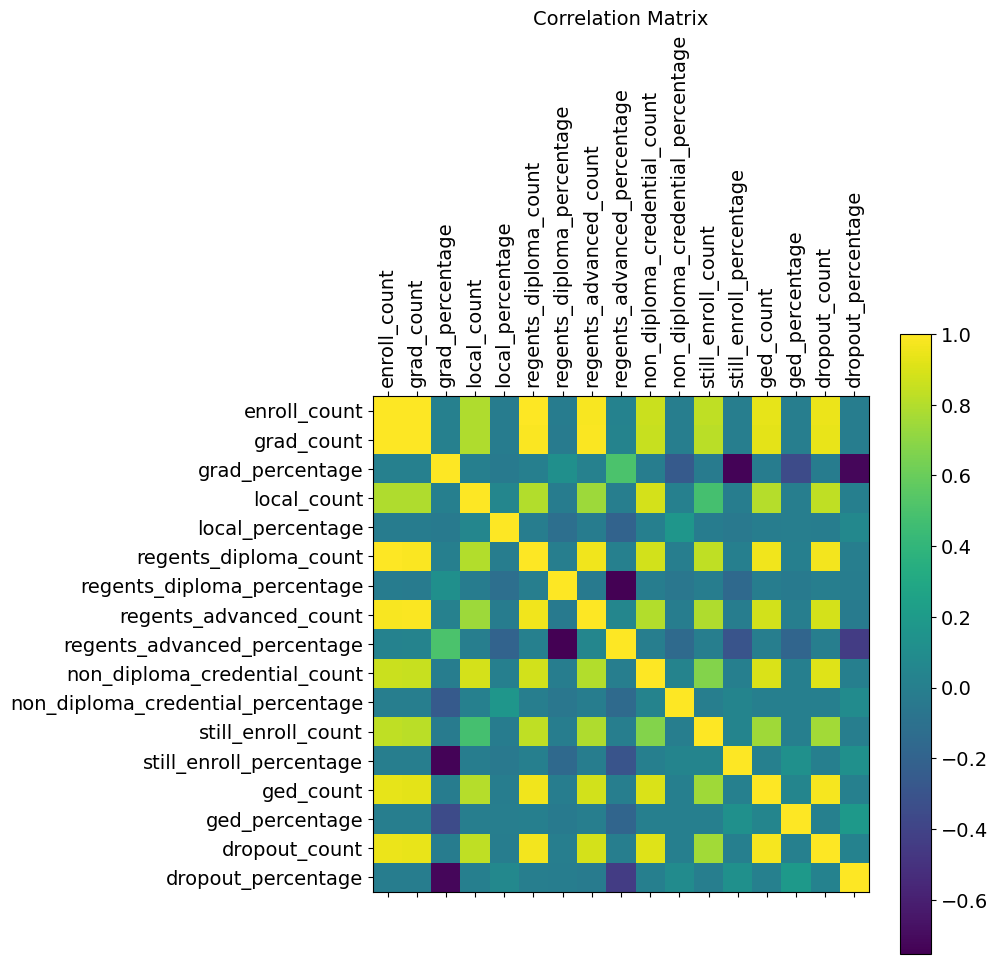

In [51]:
# Creating a correlation heatmap

corr_figure = plt.figure(figsize=(8, 8)) # Size of the figure
plt.matshow(df_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
corr_cb = plt.colorbar() # add a colorbar
corr_cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr_all.png")  #save

Observations: It's hard to read the heatmap and see the relationships among those variables. Therefore, I'm going to create the correlation heatmap using seaborn.

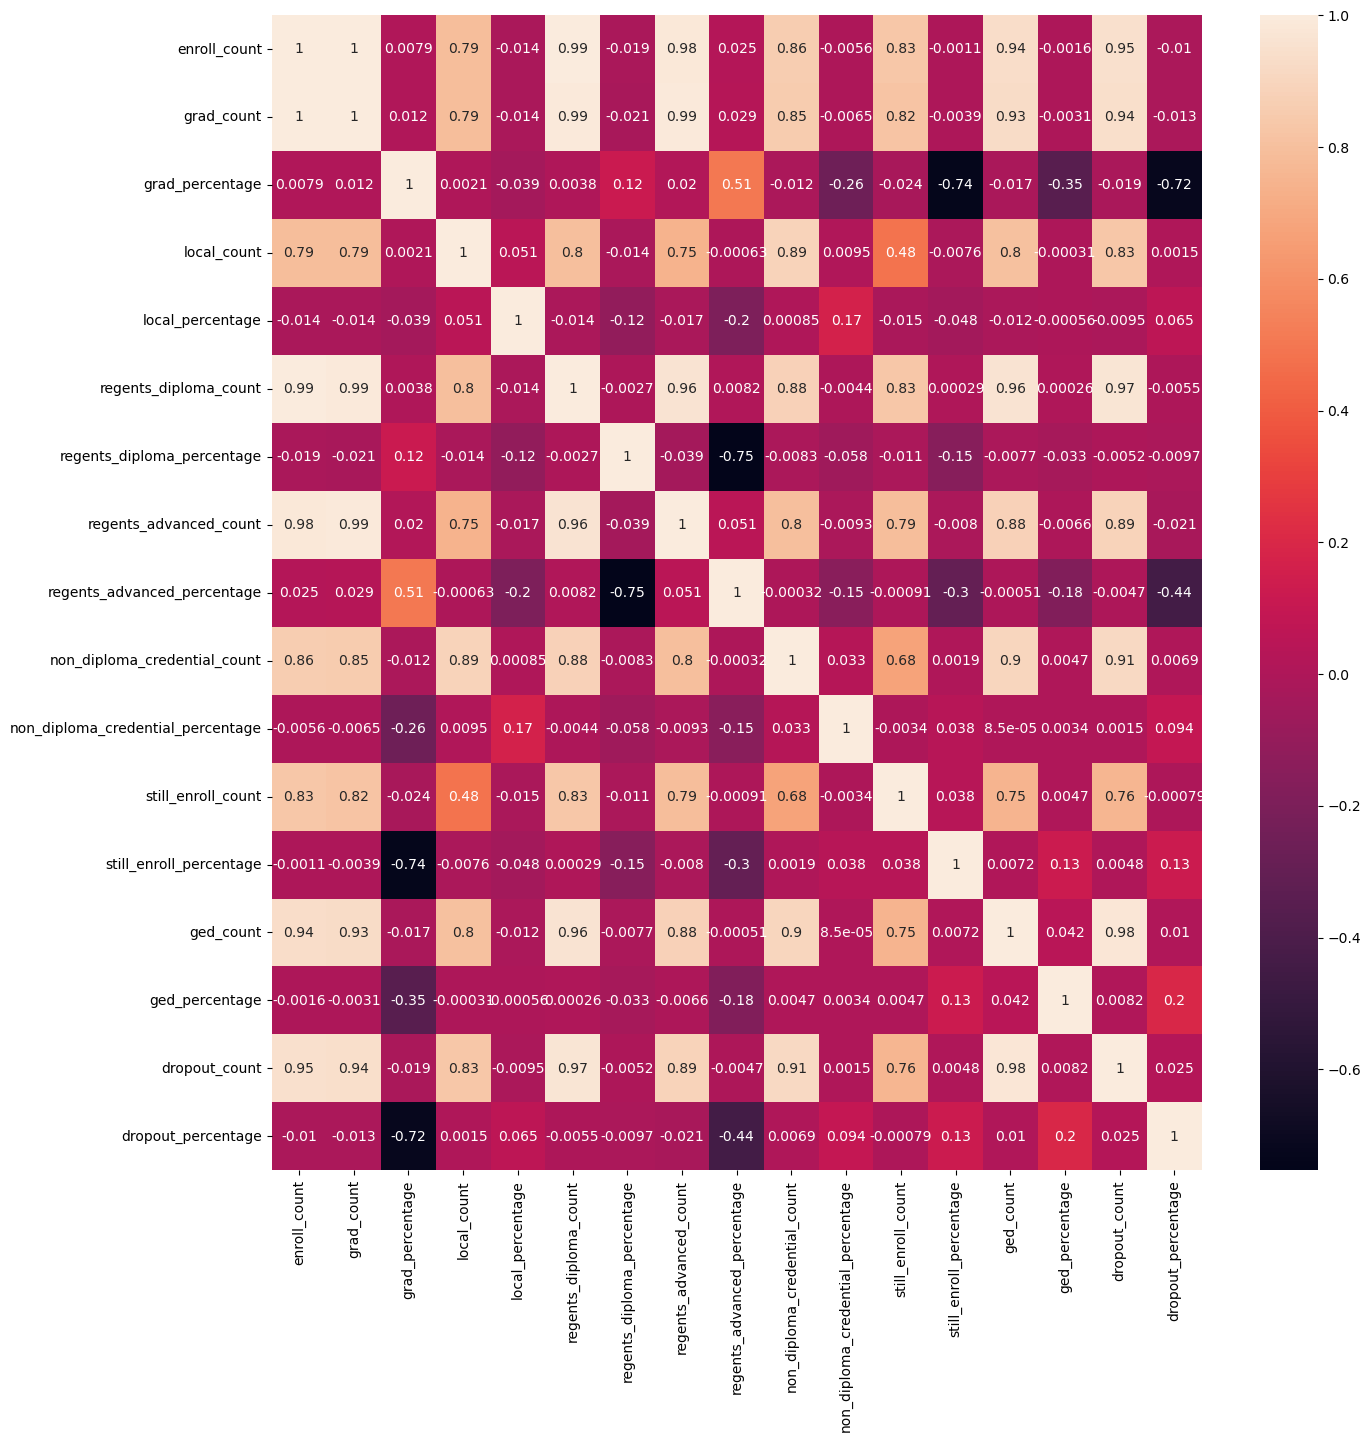

In [54]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

Observations: There are definitely some variables that have strong correlations based on this heatmap. For instance, we can see some strong relationships between enroll count, grad count vs regents diploma count (0.99), enroll count, grad count and regents advanced count (0.99, 0.98), regent diploma count and ged count (0.98), drop out count and enroll count (0.95), drop out count and grad count (0.94), etc.

## 4. Create Scatterplot or the variables with the strongest correlations and examine the nature of their relationships.

Some variables have a high correlation coefficient. But to find out if the correlation is functional, we have to find out if the correlation is linear. If it is linear, it means that the variables can have an impact on one another.¶


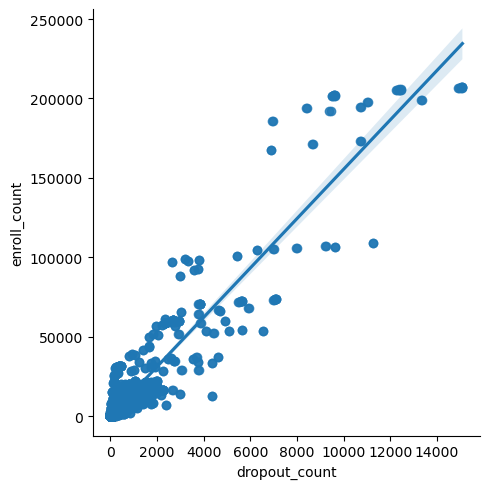

In [64]:
# Create a scatterplot for the "dropout_count" and "enroll_count" columns in seaborn

scatter_dropout_enroll=sns.lmplot(x = 'dropout_count', y = 'enroll_count', data = df_sub)

Observations: The scatterplot has a few outliers. The scatterplot points generally follow an upward trend, indicating that as the "enroll_count" increases, the "dropout_count" also tends to increase.

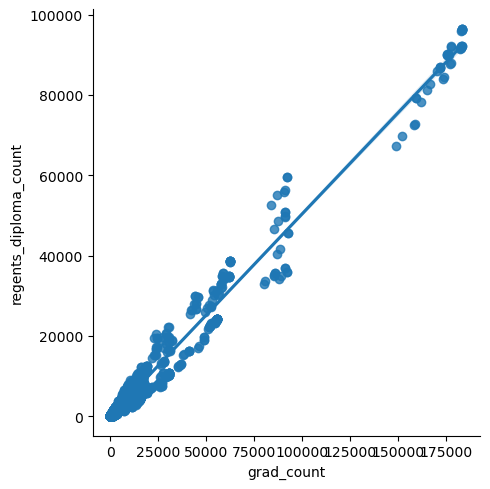

In [65]:
# Create a scatterplot for the "grad_count" and "regents_diploma_count" columns in seaborn

scatter_grad_regents=sns.lmplot(x = 'grad_count', y = 'regents_diploma_count', data = df_sub) 

Observations: The scatterplot points generally follow an upward trend, indicating that as the "regents_diploma_count" increases, the "grad_count" also tends to increase.

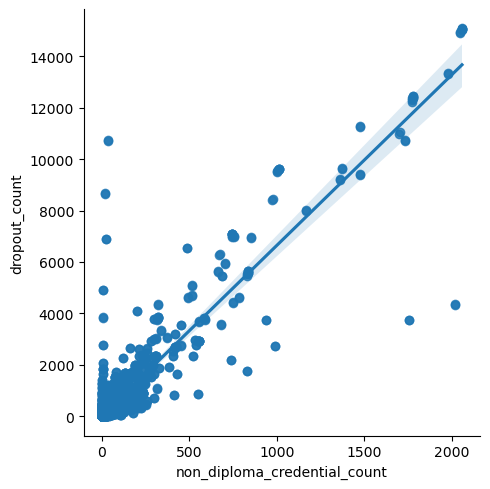

In [68]:
# Create a scatterplot for the "dropout_count" and "non_diploma_credential_count" columns in seaborn
scatter_dropout_regents=sns.lmplot(x='non_diploma_credential_count', y='dropout_count', data=df_sub)

Observations: The scatterplot has some outliers. The scatterplot points generally follow an upward trend, indicating that as the "non_diploma_credential_count" increases, the "dropout_count" also tends to increase.

## 5. Create a pair plot of the entire data set.

In [69]:
# Keep only the variables that we want to use in the pair plot

df_sub_2 = df_sub[['enroll_count', 'grad_count', 'local_count', 'regents_diploma_count', 'regents_advanced_count', 'non_diploma_credential_count', 'still_enroll_count', 'ged_count', 'dropout_count']]


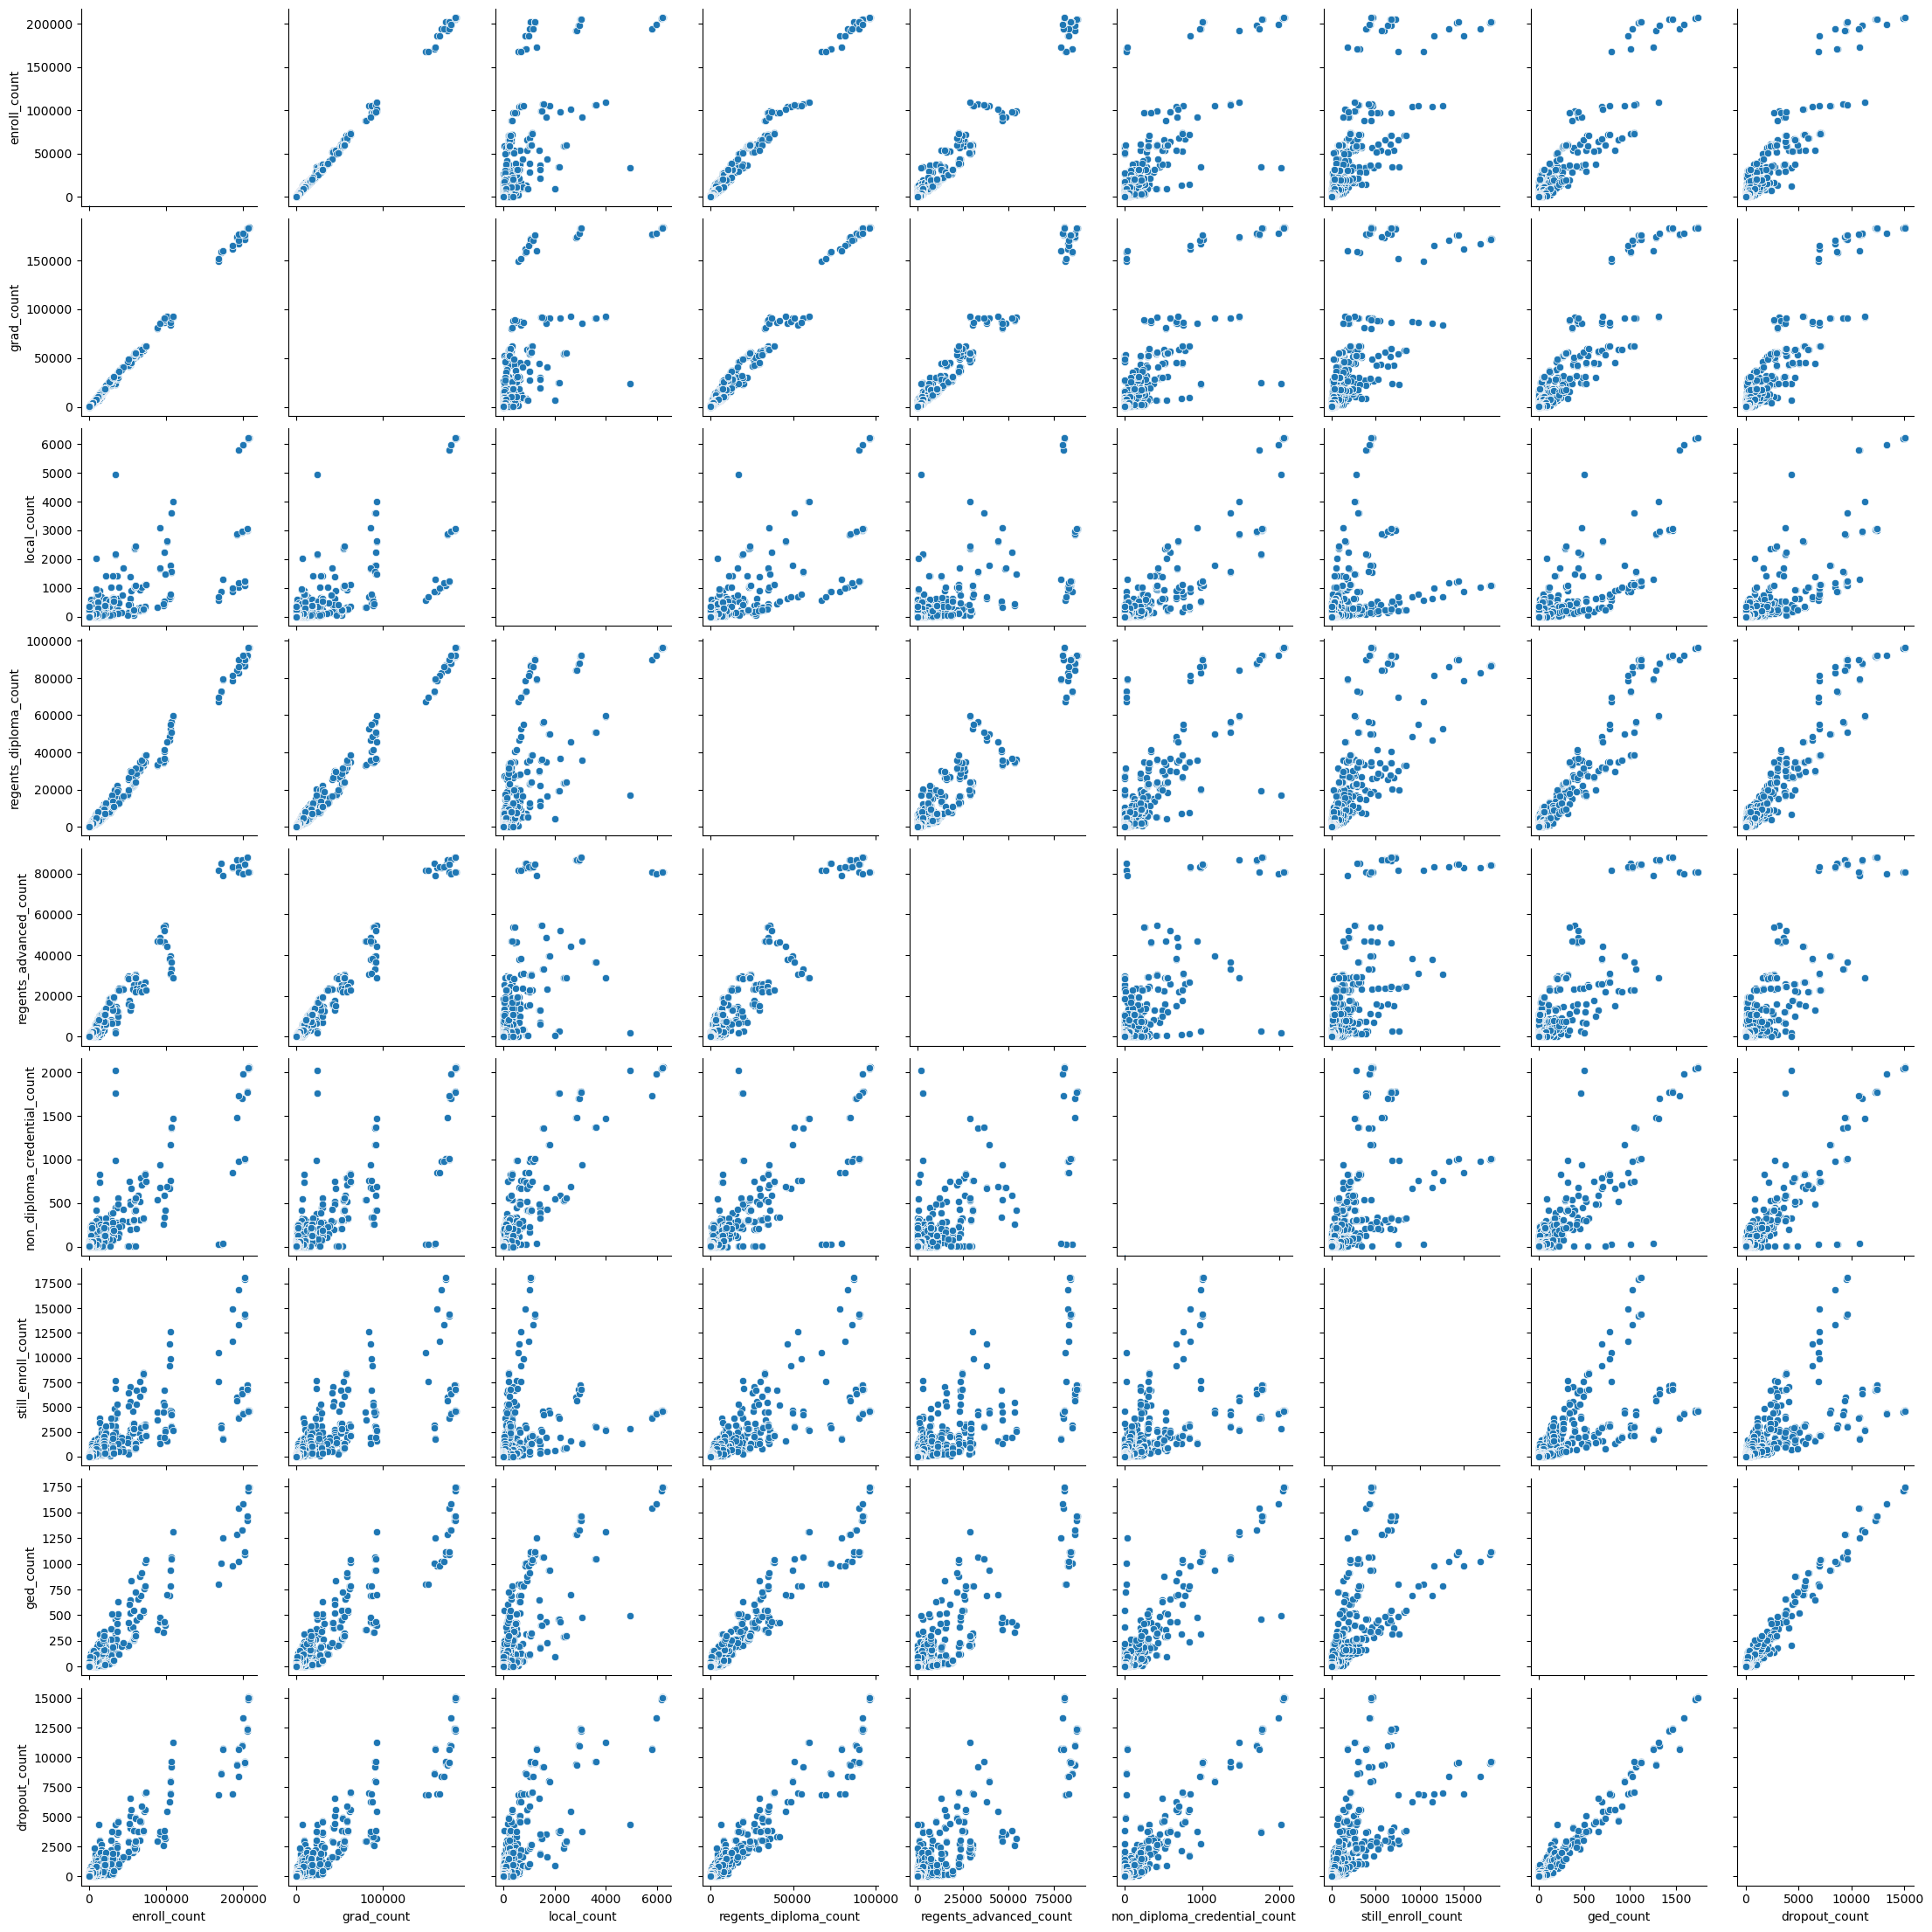

In [70]:
# Create a pair plot 

g = sns.pairplot(df_sub_2)

Observations: There are many interesting relationships to explore. I'm curious about the realtionship between ged_count and dropout_count

## 6. Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='grad_count', ylabel='Count'>

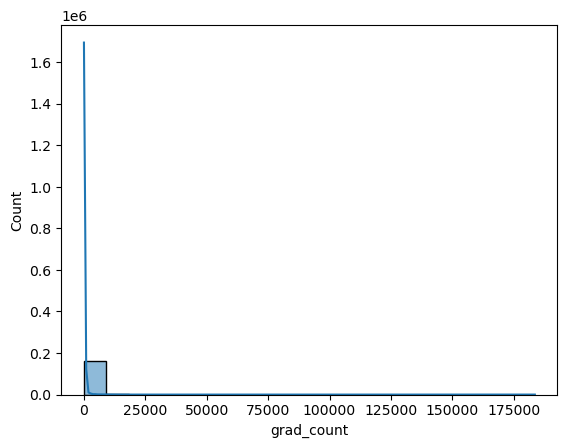

In [100]:
# Use a histogram to visualize the distribution of the variables. 
# This way, we can determine sensible categories for the non diploma ranges. 
# We don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution
# Create a histogram for the non_diploma_credential_count column

sns.histplot(df_sub_2['grad_count'], bins = 20, kde = True)

Observations: Outliers make it difficult to see the distribution. Therefore, I create a new dataset to check the actual distribution

In [108]:
df_grad = df_sub_2.loc[df_sub_2['grad_count'] <1000]

<AxesSubplot:xlabel='grad_count', ylabel='Count'>

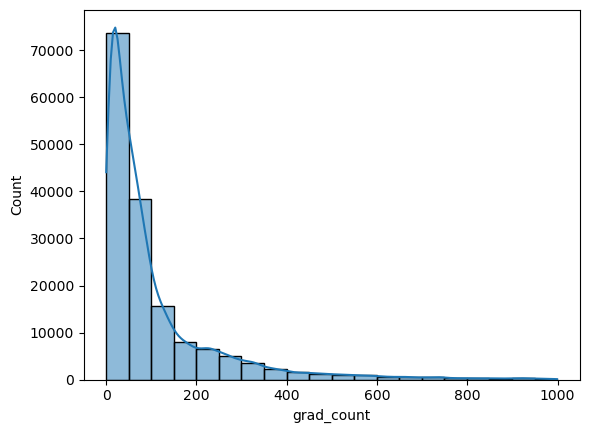

In [109]:
# Create the histogram with the new dataframe

sns.histplot(df_grad['grad_count'], bins = 20, kde = True)

Observation:  According to the histogram, the majority of values falls under 100, a low value.
Therefore, I will create categories using the following criteria:

* if <= 100 = Low
* if > 100 and <= 300 = Medium
* if > 300 = High


In [134]:
df_grad.loc[df_grad['grad_count'] <= 100, 'grad_count_category'] = 'Low'

/var/folders/y2/dchd2q8n46v5x913n10wj3ph0000gn/T/ipykernel_98144/3724160400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad.loc[df_grad['grad_count'] <= 100, 'grad_count_category'] = 'Low'


In [135]:

df_grad.loc[(df_grad['grad_count'] > 100) & (df_grad['grad_count'] <= 300), 'grad_count_category'] = 'Middle'

In [136]:
df_grad.loc[df_grad['grad_count'] > 300, 'grad_count_category'] = 'High'

In [137]:
df_grad['grad_count_category'].value_counts(dropna = False)

Low       112398
Middle     34905
High       13325
Name: grad_count_category, dtype: int64

In [138]:
df_grad.columns

Index(['enroll_count', 'grad_count', 'local_count', 'regents_diploma_count',
       'regents_advanced_count', 'non_diploma_credential_count',
       'still_enroll_count', 'ged_count', 'dropout_count',
       'grad_count_category'],
      dtype='object')

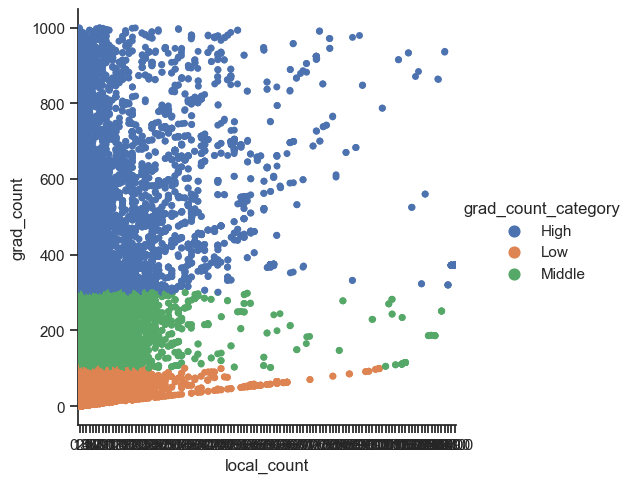

In [139]:
# Create a categorical plot in seaborn using the grad_count_categories created above

sns.set(style="ticks")
g = sns.catplot(x="local_count", y="grad_count", hue="grad_count_category", data=df_grad)

Observations: From this catplot, we can see that a lower students who earn local diploma (x axis) equates to a smaller number of grad count (y axis).


## 7. Key Questions

#### How does the graduation rate vary across different counties?
No analysis on this yet.
#### How does the graduation rate vary across different cohorts and subgroup demographics?
No analysis on this yet.
#### Are there any significant differences in graduation rates between students who earned a Regents diploma and those who earned a Local diploma?
No analysis on this yet.
#### What is the distribution of students who earned a Regents diploma with Advanced Designation across different cohorts?
No analysis on this yet.
#### How does the enrollment count vary across different districts and schools?
No analysis on this yet.
#### Are there any patterns or trends in the dropout rates among different demographic subgroups?
No analysis on this yet.
#### How does the percentage of students still enrolled in the cohort vary across different cohorts and entities?
No analysis on this yet.
#### Any correlations or relationships between the enrollment count and the graduation rates?
The scatterplot points follow an upward trend, indicating that as the "enrollment count" increases, the "grad count" also tends to increase. There is a very strong relationship between the two (1)

### New questions came up during this analysis
#### Any correlations between the enrollment count and drop out count?
The scatterplot points follow an upward trend, indicating that as the "enrollment count" increases, the "drop out count" also tends to increase. There is a very strong relationship between the two (0.95)
#### Any correlations between the regents diploma count and grad count?
The scatterplot points follow an upward trend, indicating that as the "regents diploma count" increases, the "grad count" also tends to increase. There is a very strong relationship between the two (0.99)



# 8. Define any hypotheses.

Hypothesis 1:

If the more students enroll, the higher grad rate it will be.

Hypothesis 2:

If the higher rate of students with regent diploma, the higher grad rate it will be.



# 9. Export Data

In [9]:
df_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NY_grad_rate_22_cleaned.csv'))

NameError: name 'df_sub' is not defined

In [2]:
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'NY_grad_rate_22_cleaned.csv'))


NameError: name 'df_sub' is not defined